In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lombardia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2020-12-06T17:00:00,3,Lombardia,6372,807,7179,109200,116379,623,2413,...,140.0,26026.0,7850.0,803.0,11.24,6.17,9.27,30.74,0.25,0.54
286,2020-12-07T17:00:00,3,Lombardia,6362,781,7143,108857,116000,-379,1562,...,56.0,16757.0,5184.0,-343.0,10.93,6.16,9.32,30.13,-3.22,-0.33
287,2020-12-08T17:00:00,3,Lombardia,6187,767,6954,104875,111829,-4171,1656,...,128.0,16276.0,5226.0,-3982.0,11.03,6.22,10.17,31.69,-1.79,-3.60
288,2020-12-09T17:00:00,3,Lombardia,5727,766,6493,83410,89903,-21926,1233,...,69.0,14175.0,4375.0,-21465.0,11.80,7.22,8.70,28.18,-0.13,-19.61


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2093
Nuovi tamponi: 24229.0
Percentuale nuovi positivi/nuovi tamponi: 8.6 %
Nuovi guariti: 4581.0
Nuovi deceduti: 172.0
Variazione positivi ricoverati con sintomi: -114.0
Variazione positivi in terapia intensiva: -18.0
Variazione positivi in isolamento dimiciliare: -2528.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 10, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-11T17:00:00,3,Lombardia,433,48,481,12368,12849,827,1032,...,3.0,15590.0,9950.0,798.0,9.98,3.74,6.62,10.37,9.09,6.88
1,2020-10-12T17:00:00,3,Lombardia,463,50,513,12866,13379,530,696,...,3.0,13934.0,9520.0,498.0,9.75,3.83,4.99,7.31,4.17,4.12
2,2020-10-13T17:00:00,3,Lombardia,546,62,608,13648,14256,877,1080,...,6.0,17186.0,11433.0,782.0,10.20,4.26,6.28,9.45,24.00,6.56
3,2020-10-14T17:00:00,3,Lombardia,645,64,709,14509,15218,962,1844,...,17.0,29048.0,18391.0,861.0,9.03,4.66,6.35,10.03,3.23,6.75
4,2020-10-15T17:00:00,3,Lombardia,726,72,798,16252,17050,1832,2067,...,26.0,32507.0,20318.0,1743.0,9.02,4.68,6.36,10.17,12.50,12.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-06T17:00:00,3,Lombardia,6372,807,7179,109200,116379,623,2413,...,140.0,26026.0,7850.0,803.0,11.24,6.17,9.27,30.74,0.25,0.54
57,2020-12-07T17:00:00,3,Lombardia,6362,781,7143,108857,116000,-379,1562,...,56.0,16757.0,5184.0,-343.0,10.93,6.16,9.32,30.13,-3.22,-0.33
58,2020-12-08T17:00:00,3,Lombardia,6187,767,6954,104875,111829,-4171,1656,...,128.0,16276.0,5226.0,-3982.0,11.03,6.22,10.17,31.69,-1.79,-3.60
59,2020-12-09T17:00:00,3,Lombardia,5727,766,6493,83410,89903,-21926,1233,...,69.0,14175.0,4375.0,-21465.0,11.80,7.22,8.70,28.18,-0.13,-19.61


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

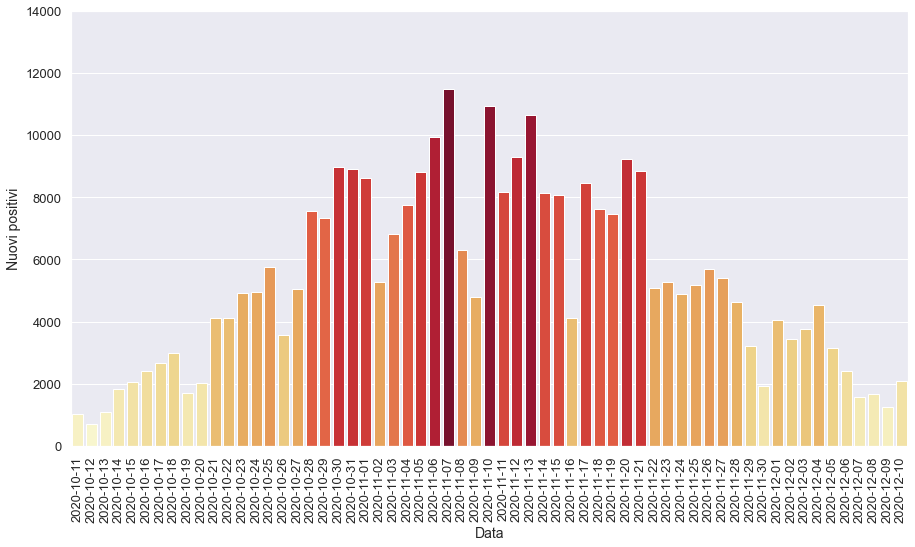

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

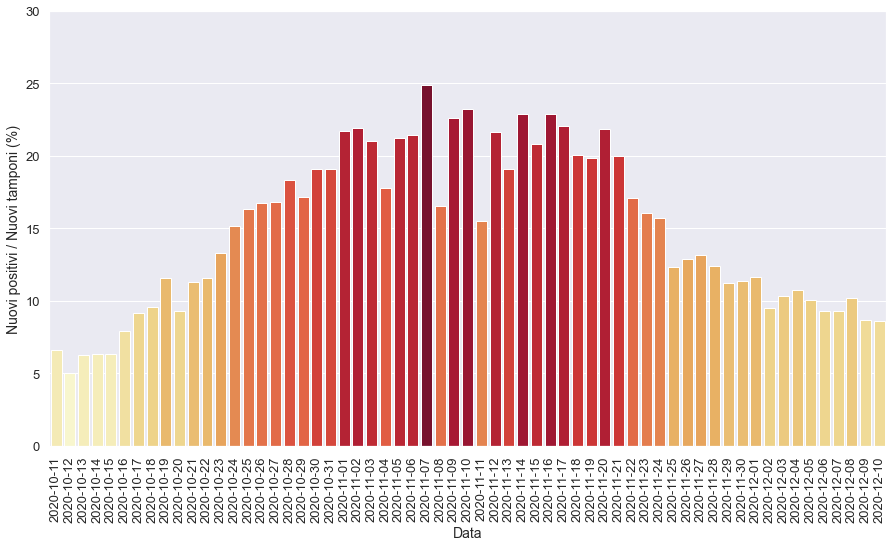

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

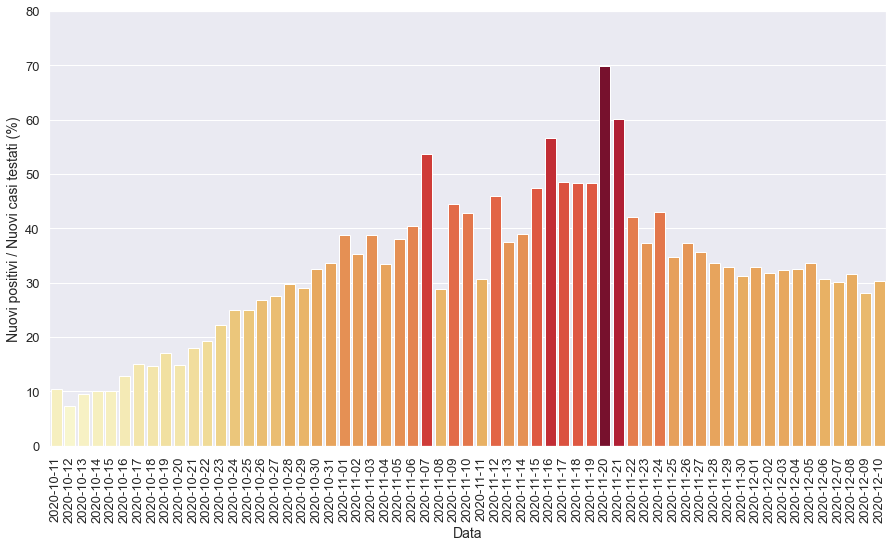

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

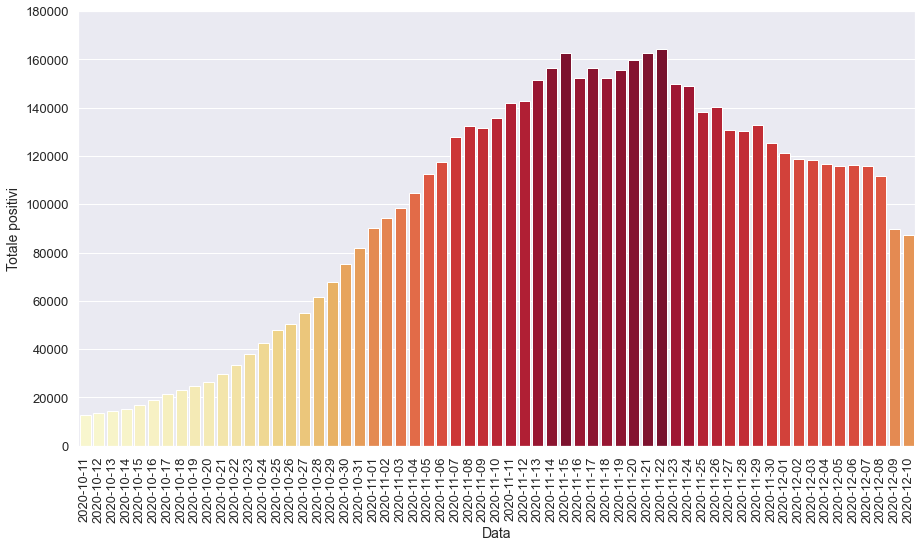

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

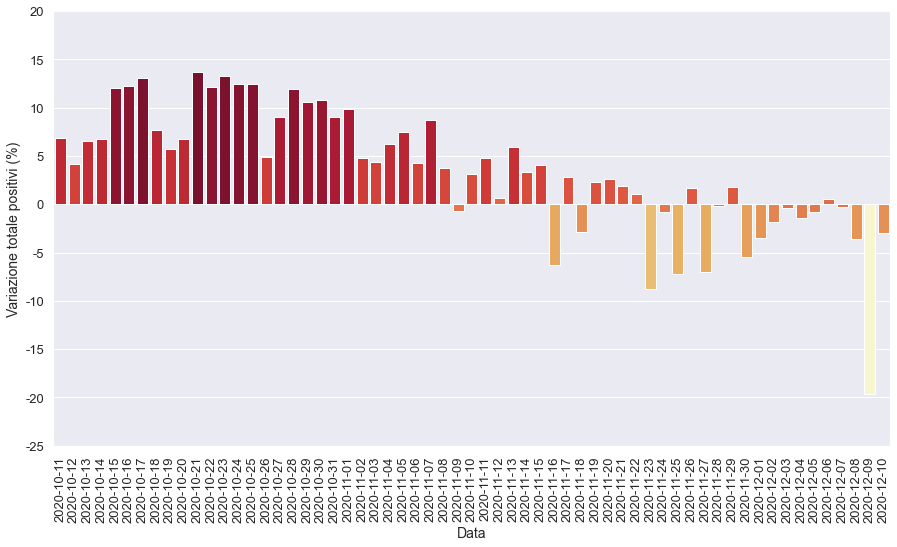

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

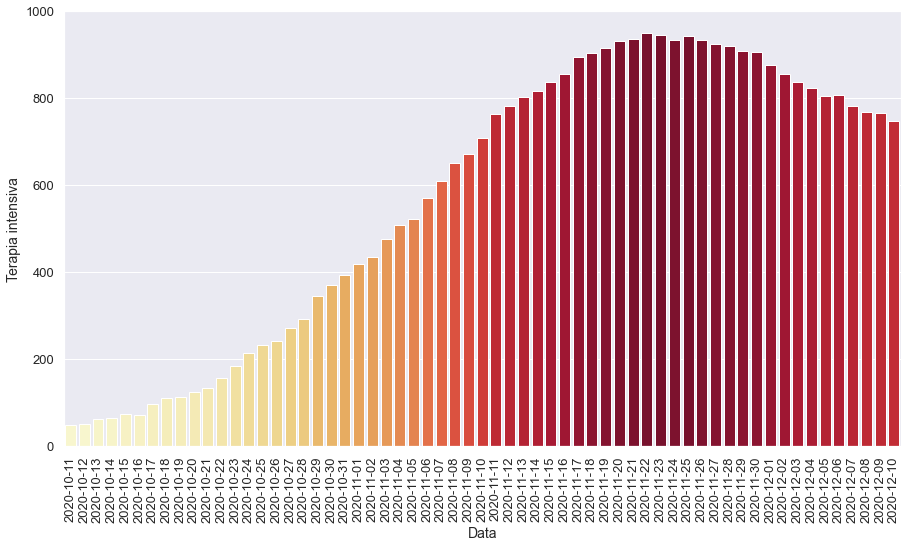

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

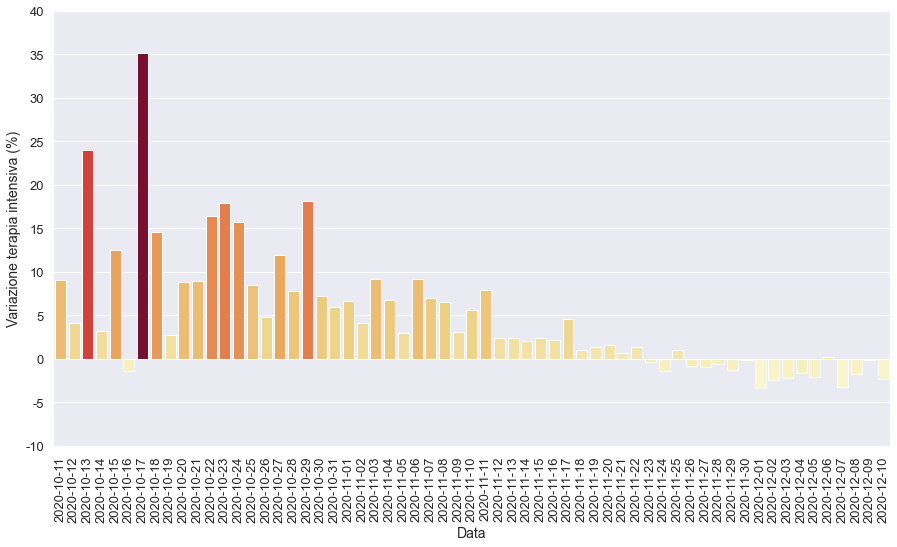

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

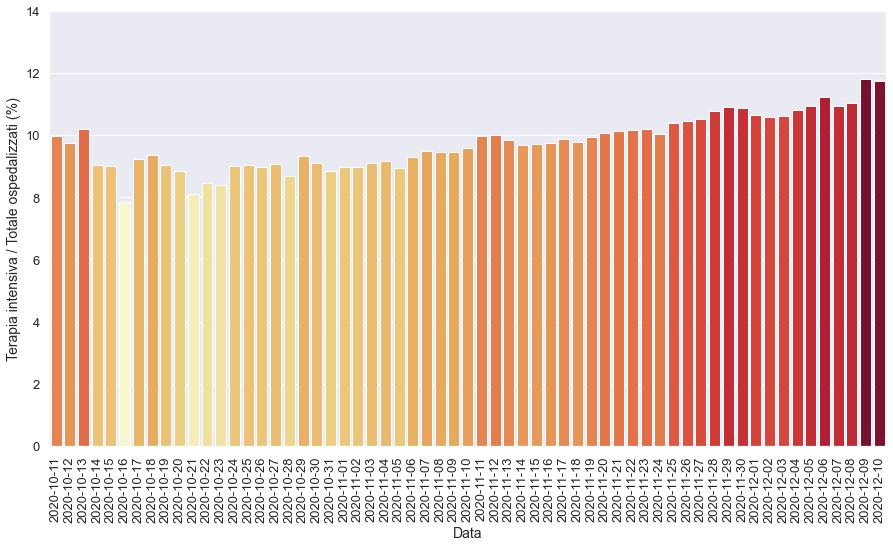

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

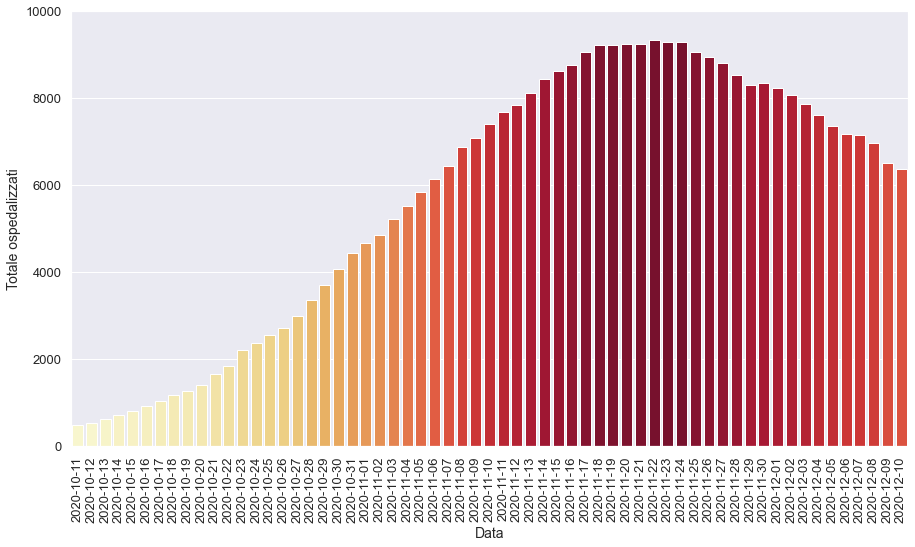

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

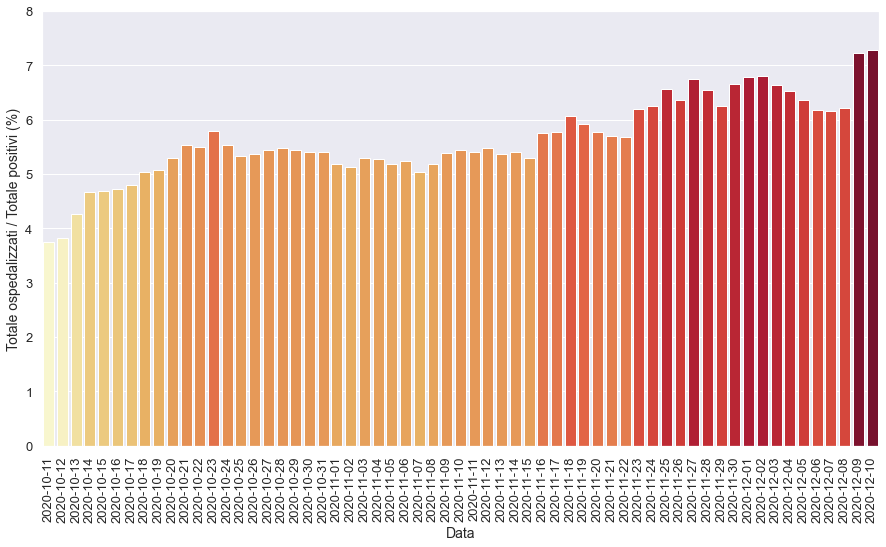

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

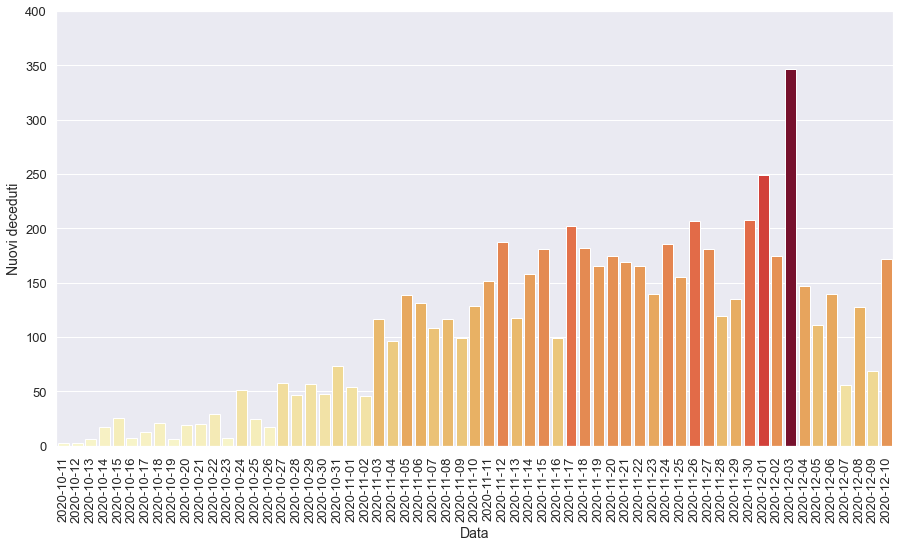

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

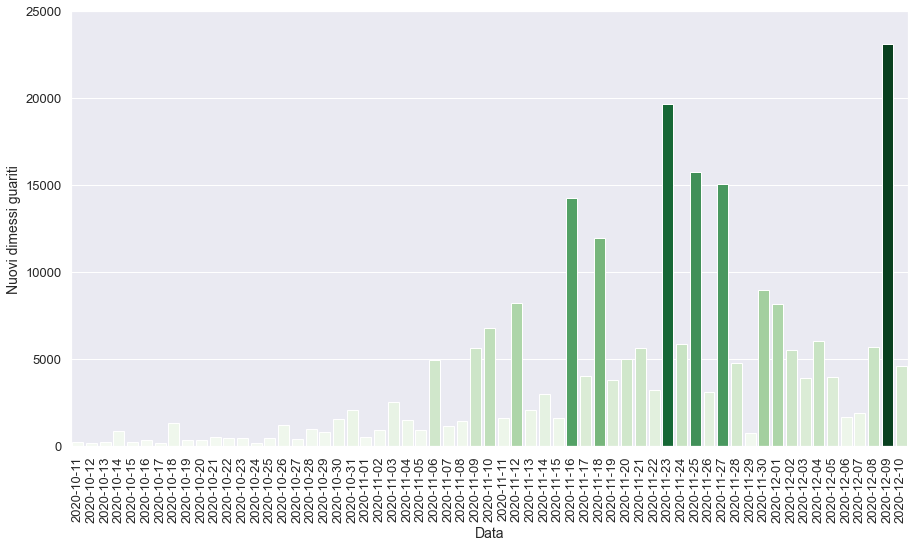

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,3,Lombardia,6682,708,7390,128115,135505,4046,10955,...,129.0,47194.0,25538.0,3740.0,9.58,5.45,23.21,42.90,5.67,3.08
1,2020-11-11T17:00:00,3,Lombardia,6907,764,7671,134247,141918,6413,8180,...,152.0,52712.0,26723.0,6132.0,9.96,5.41,15.52,30.61,7.91,4.73
2,2020-11-12T17:00:00,3,Lombardia,7047,782,7829,134964,142793,875,9291,...,187.0,42933.0,20250.0,717.0,9.99,5.48,21.64,45.88,2.36,0.62
3,2020-11-13T17:00:00,3,Lombardia,7319,801,8120,143149,151269,8476,10634,...,118.0,55636.0,28381.0,8185.0,9.86,5.37,19.11,37.47,2.43,5.94
4,2020-11-14T17:00:00,3,Lombardia,7621,817,8438,147841,156279,5010,8129,...,158.0,35550.0,20854.0,4692.0,9.68,5.40,22.87,38.98,2.00,3.31
5,2020-11-15T17:00:00,3,Lombardia,7781,837,8618,153923,162541,6262,8060,...,181.0,38702.0,16990.0,6082.0,9.71,5.30,20.83,47.44,2.45,4.01
6,2020-11-16T17:00:00,3,Lombardia,7901,855,8756,143583,152339,-10202,4128,...,99.0,18037.0,7285.0,-10340.0,9.76,5.75,22.89,56.66,2.15,-6.28
7,2020-11-17T17:00:00,3,Lombardia,8151,894,9045,147522,156567,4228,8448,...,202.0,38283.0,17384.0,3939.0,9.88,5.78,22.07,48.60,4.56,2.78
8,2020-11-18T17:00:00,3,Lombardia,8323,903,9226,142857,152083,-4484,7633,...,182.0,38100.0,15780.0,-4665.0,9.79,6.07,20.03,48.37,1.01,-2.86
9,2020-11-19T17:00:00,3,Lombardia,8291,915,9206,146374,155580,3497,7453,...,165.0,37595.0,15423.0,3517.0,9.94,5.92,19.82,48.32,1.33,2.30


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

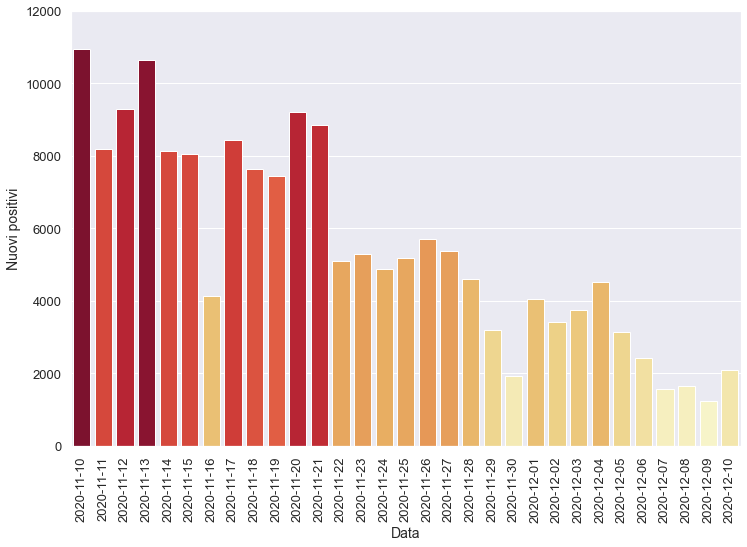

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

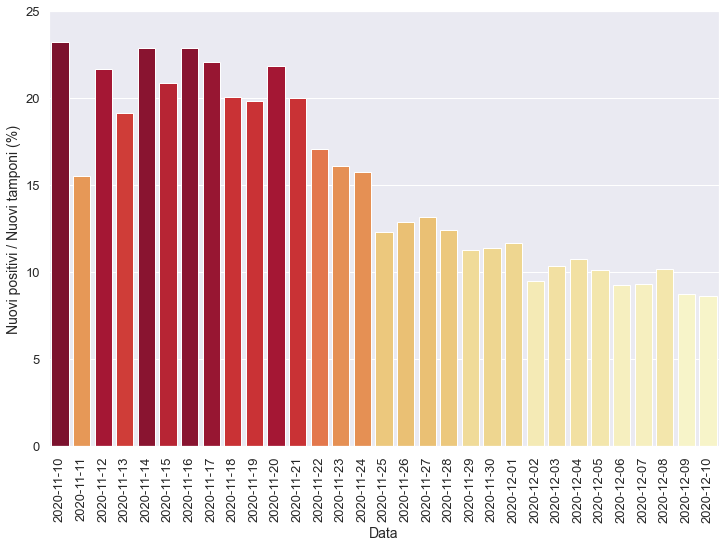

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

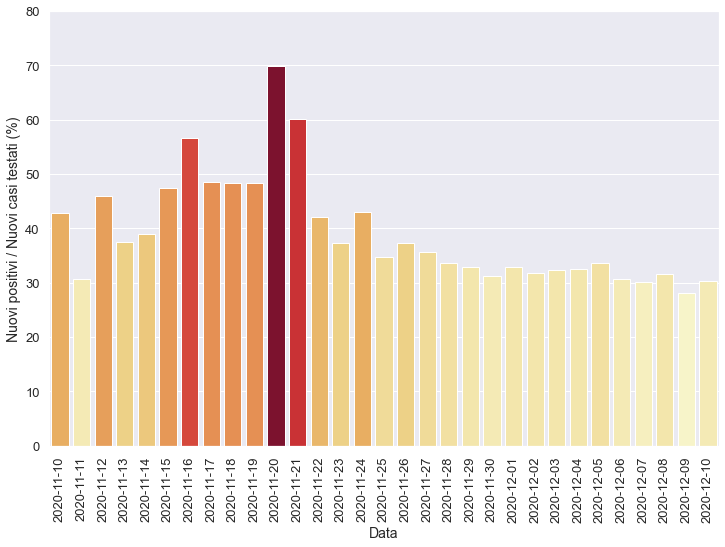

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

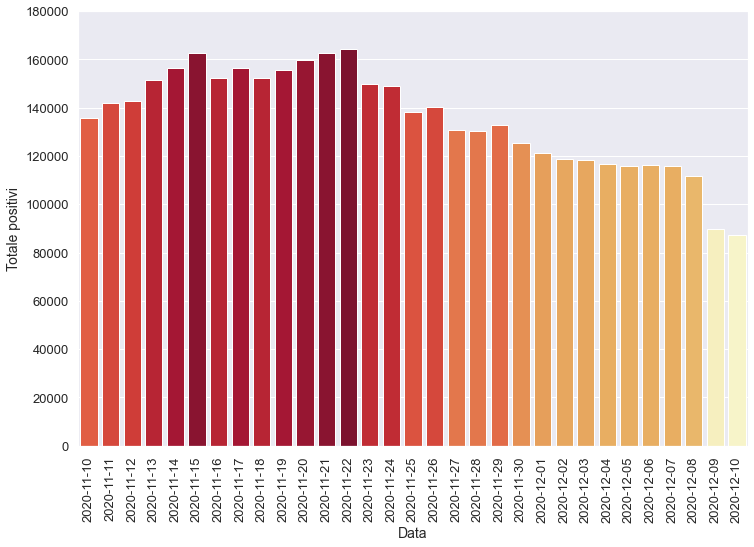

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

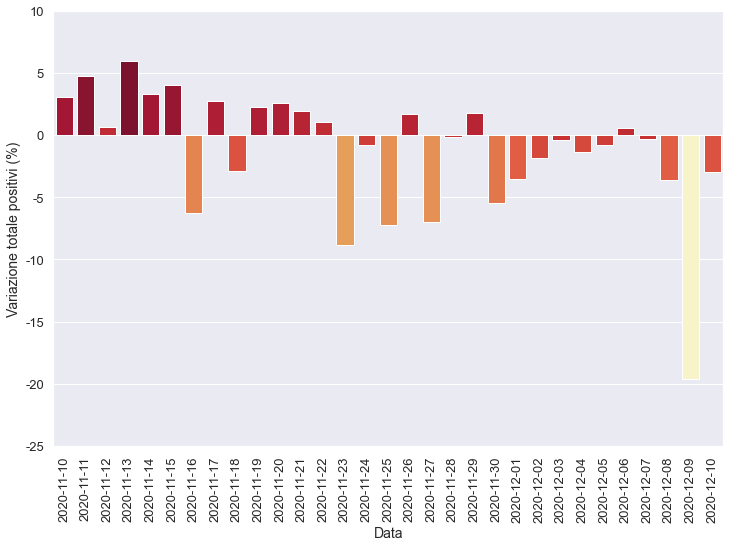

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

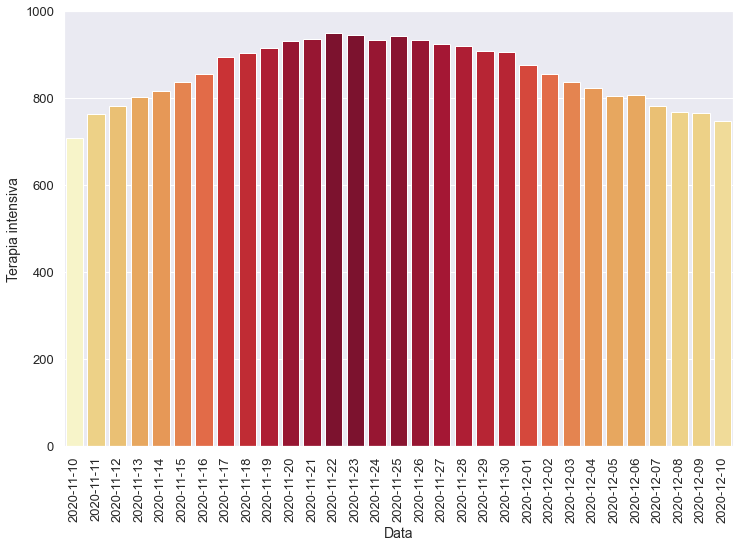

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

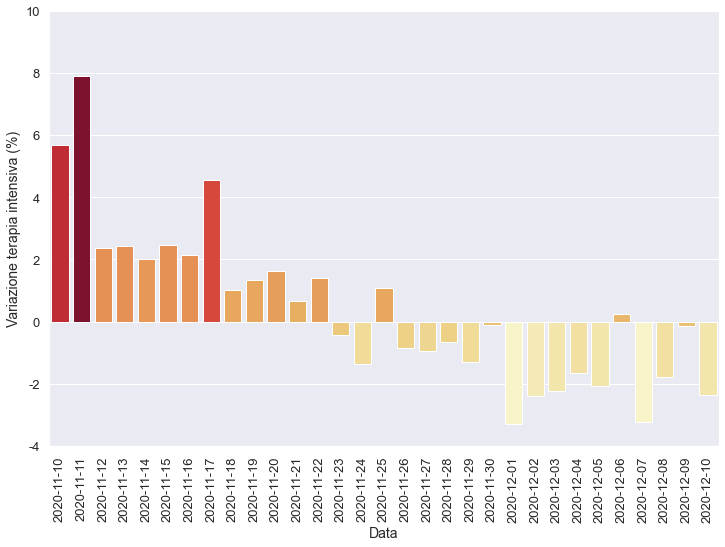

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

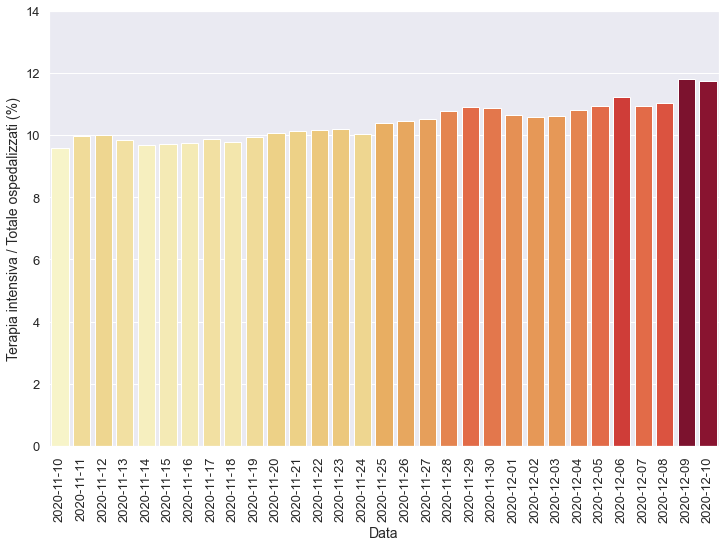

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

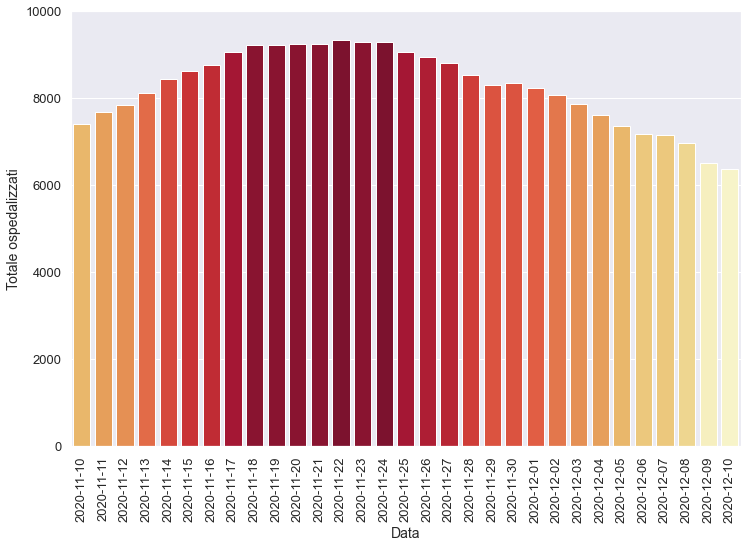

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

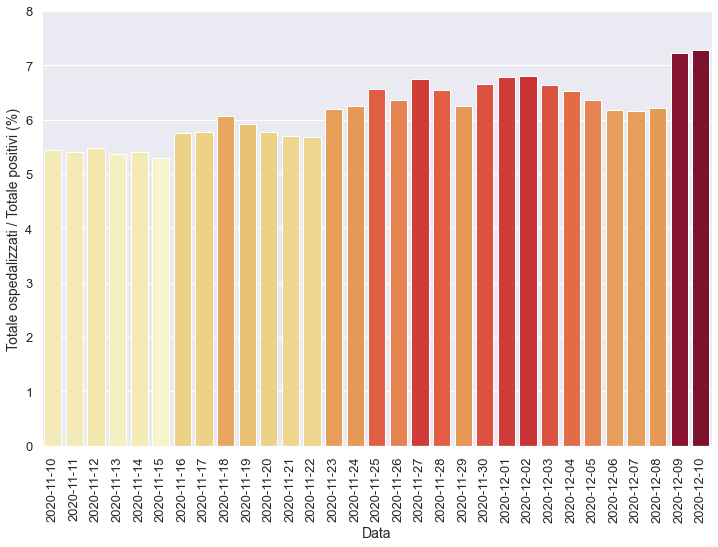

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

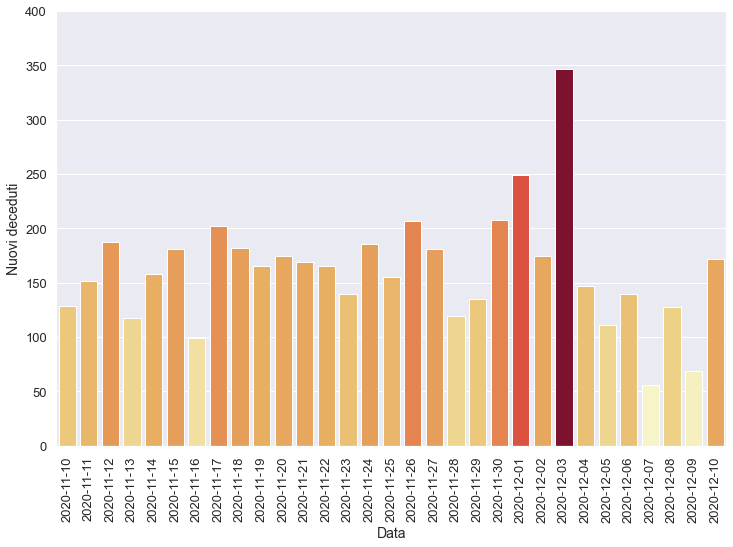

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

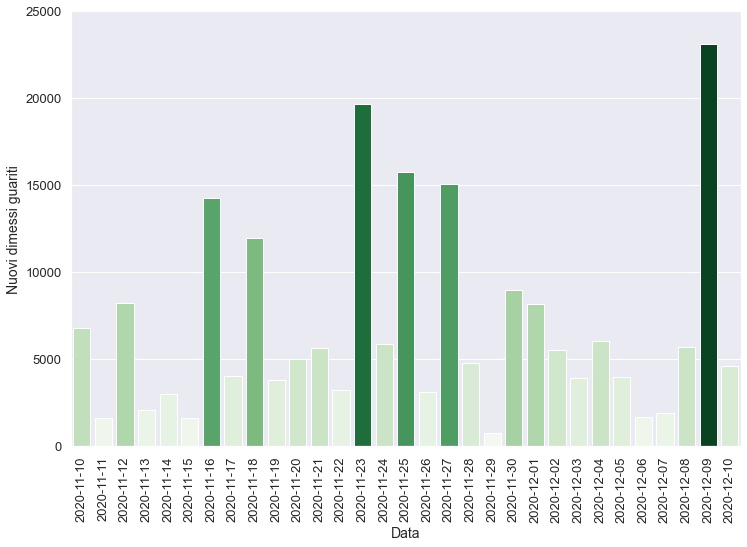

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-03T17:00:00,3,Lombardia,7025,836,7861,110470,118331,-465,3751,...,347.0,36271.0,11569.0,-249.0,10.63,6.64,10.34,32.42,-2.22,-0.39
1,2020-12-04T17:00:00,3,Lombardia,6792,822,7614,109088,116702,-1629,4533,...,147.0,42276.0,13949.0,-1382.0,10.80,6.52,10.72,32.50,-1.67,-1.38
2,2020-12-05T17:00:00,3,Lombardia,6554,805,7359,108397,115756,-946,3148,...,111.0,31193.0,9364.0,-691.0,10.94,6.36,10.09,33.62,-2.07,-0.81
3,2020-12-06T17:00:00,3,Lombardia,6372,807,7179,109200,116379,623,2413,...,140.0,26026.0,7850.0,803.0,11.24,6.17,9.27,30.74,0.25,0.54
4,2020-12-07T17:00:00,3,Lombardia,6362,781,7143,108857,116000,-379,1562,...,56.0,16757.0,5184.0,-343.0,10.93,6.16,9.32,30.13,-3.22,-0.33
5,2020-12-08T17:00:00,3,Lombardia,6187,767,6954,104875,111829,-4171,1656,...,128.0,16276.0,5226.0,-3982.0,11.03,6.22,10.17,31.69,-1.79,-3.60
6,2020-12-09T17:00:00,3,Lombardia,5727,766,6493,83410,89903,-21926,1233,...,69.0,14175.0,4375.0,-21465.0,11.80,7.22,8.70,28.18,-0.13,-19.61
7,2020-12-10T17:00:00,3,Lombardia,5613,748,6361,80882,87243,-2660,2093,...,172.0,24229.0,6902.0,-2528.0,11.76,7.29,8.64,30.32,-2.35,-2.96


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

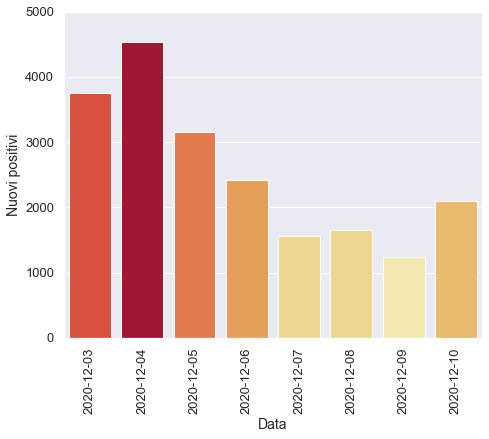

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

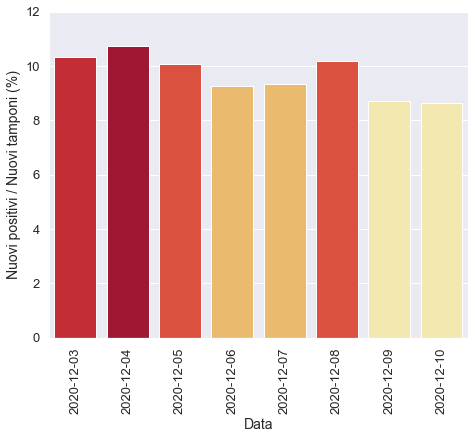

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

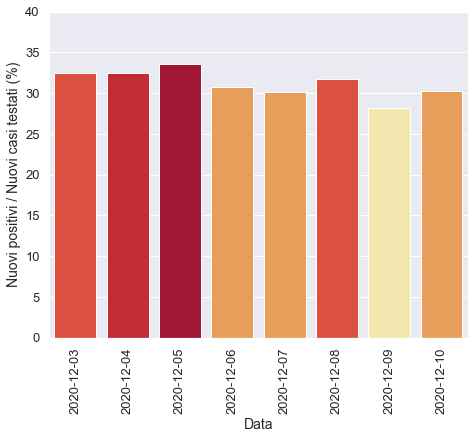

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

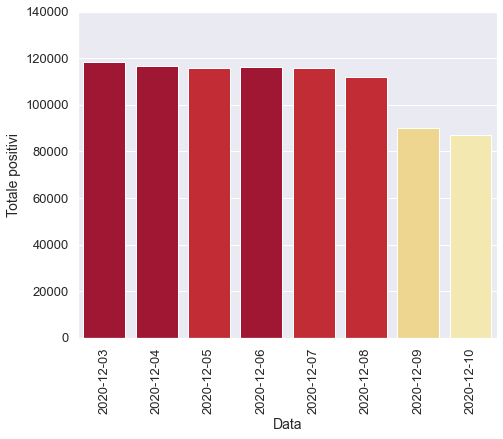

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

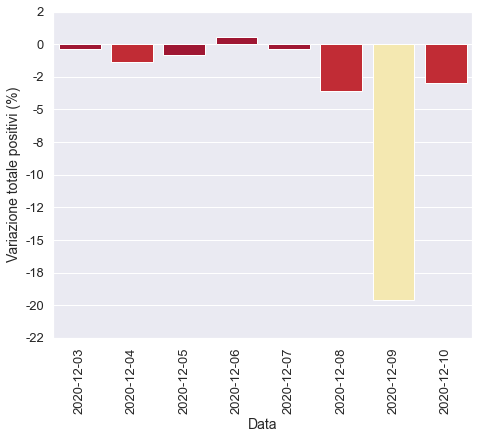

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

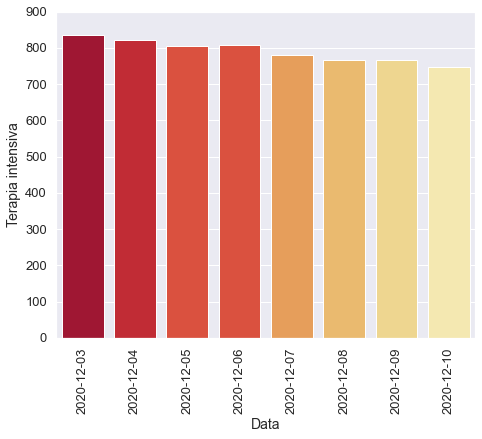

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

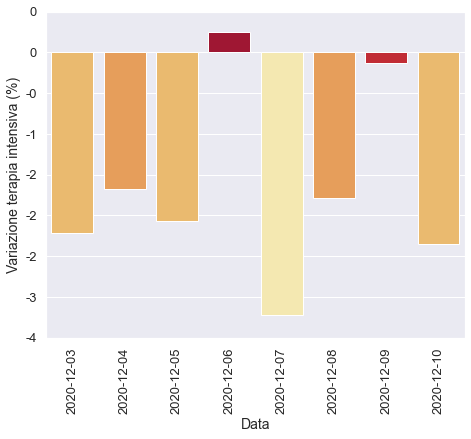

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

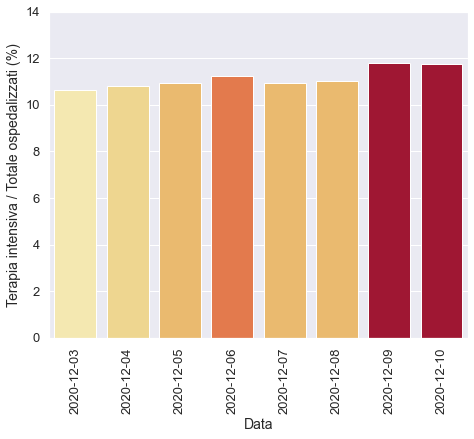

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

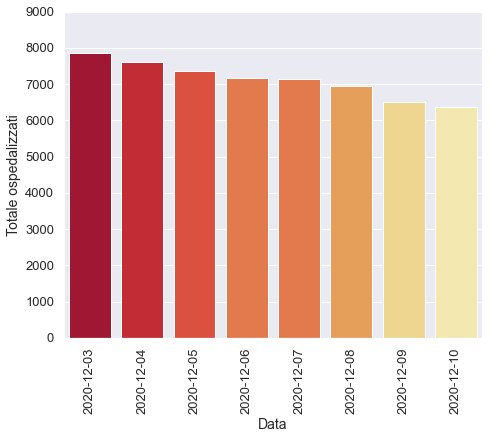

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

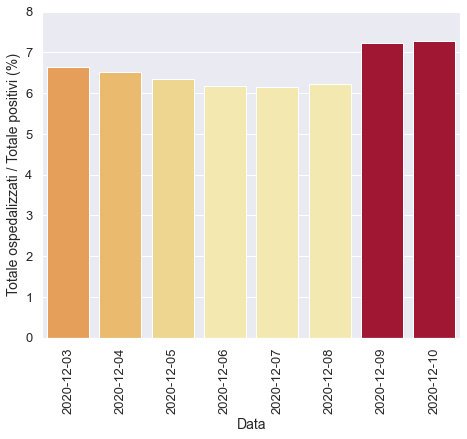

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

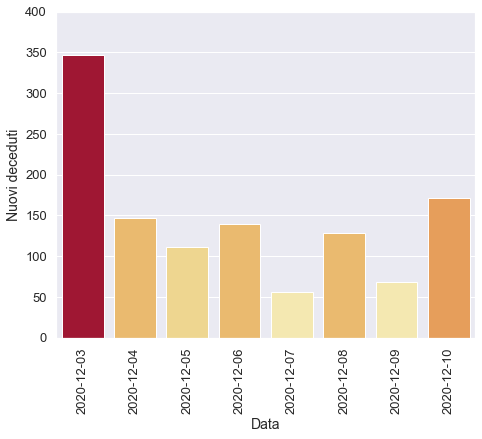

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

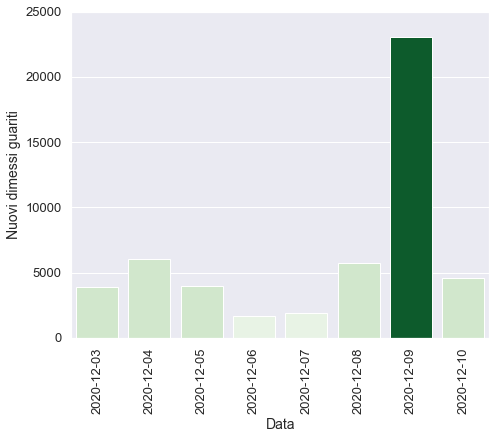

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)